IMPORTIAMO I MODULI E INIZIALIZZIAMO TUTTE LE VARIABILI CHE CI INTERESSANO


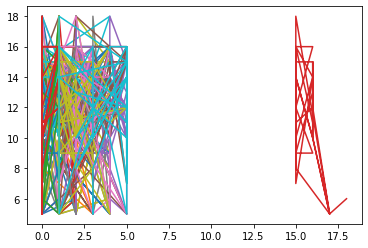

In [69]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

data = pd.read_csv('student-mat.csv')

data = np.array(data)
data = np.hstack((np.ones((data.shape[0], 1)), data))

X = data[:40, 0:30]
Y = data[:40, 32]

plt.plot(X,Y)

Y = Y.reshape(len(X), 1)
theta = np.zeros((X.shape[1],1), dtype=float)


FEATURE NORMALIZATION

In [83]:
X = X/(np.max(X))

COST FUNCTION


In [71]:
def costFunction(X,Y,theta,var_lambda):
    m = Y.size
    h = np.dot(X,theta)
    cost = (h-Y)**2
    theta[1] = 0
    J = (1/(2*m)) * sum(cost)+ (var_lambda/(2*m)* sum(theta**2))
    grad =(1/m)*np.dot(np.transpose(X),(h-Y))
    return J
    

CHIAMIAMO LA COST FUNCTION E CALCOLIAMO IL VALORE DI J


In [72]:
J = costFunction(X,Y,theta,0.01)

ALGORITMO DEL GRADIENT DESCENT

In [73]:
def gradientDescent(X, Y, theta, alpha, num_iters,var_lambda):
    m = Y.size
    J_history = np.zeros(num_iters)
    for iter in range(num_iters):
        h = np.dot(X,theta)
        theta = theta*(1-((alpha/m)*var_lambda))-(alpha/m)*np.dot(np.transpose(X), (h-Y))
        J_history[iter] =costFunction(X,Y,theta,var_lambda)
    return theta,J_history

APPLICHIAMO L'ALGORITMO E TROVIAMOCI I THETA FINALI

In [ ]:
theta_final = gradientDescent(X,Y,theta,0.01,500,0.01)
theta_final

PROVIAMO A PREDIRE UN NUOVO VALORE

In [84]:
#Trovata questa formula però non riesco ad applicarla
#predict1 = [1,(20/np.max(data[:,0]))] @ theta